## Load and read the data

In [24]:
# %pip  install geopandas matplotlib



In [25]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile
# import geopandas as gpd



In [26]:


def read_shp(file_path):
    sf = shapefile.Reader(file_path)
    fields = [f[0] for f in sf.fields[1:]]
    records = sf.records()
    df = pd.DataFrame(records, columns=fields)
    return df

district_shp = read_shp("SHAPEFILES/Uganda_Districts.shp")
subcounty_shp = read_shp("SHAPEFILES/Uganda_Subcounties.shp")
maize_shp = read_shp("SHAPEFILES/Crop_Type_Map_Maize.shp")
sorghum_shp = read_shp("SHAPEFILES/Crop_Type_Map_Sorghum.shp")



In [27]:
# Read the two tables
district_df = pd.read_csv("TABLES/Uganda_Karamoja_District_Crop_Yield_Population.csv")
subcounty_df = pd.read_csv("TABLES/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv")

## Data Understanding

In [28]:
#Check sample data for districts
district_df.head(5)

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [29]:
#Check sample data for subcounty
subcounty_df.head(5)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [30]:
# Check info about the dfs
district_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 744.0+ bytes


Data entails 7 districts with 11 columns. No null values.

 <!-- Check for duplicates -->

In [31]:
# Check info about the dfs
subcounty_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


Data entails 52 districts with 13 columns. No null values.

In [32]:
# Read maize shapefile
maize_shp.head()

,DN
0,6
1,6
2,6
3,6
4,6


In [33]:
# Read sorghum shapefile
sorghum_shp.head()

,DN
0,212
1,212
2,212
3,212
4,212


In [34]:
sorghum_shp["DN"].nunique()


1

In [35]:
# Read subcounties shapefile
subcounty_df.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [36]:
# Read district shapefile
district_df.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


## Feature Engineering

These new features to help assess the level of food security per subcounty. The per capita productivity of the 2 crops and the land-yield ratio 

will inform on land use efficiency hence insight on how much is available to the population relatively. 

In [37]:
# Create subcounty productivity per capita to gauge how much is available to the population on average
subcounty_df['S_Prod_Per_Capita'] = subcounty_df['S_Prod_Tot']/subcounty_df['POP']
subcounty_df['M_Prod_Per_Capita'] = subcounty_df['M_Prod_Tot']/subcounty_df['POP']
subcounty_df.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,S_Prod_Per_Capita,M_Prod_Per_Capita
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900,132.167234,34.836691
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500,86.833573,18.176676
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268,20.500073,0.364799
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080,49.405440,1.005072
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400,57.529819,3.372847


In [38]:
#Create subcounty land-yield ratio to investigate land use efficiency
# Land use efficiency = (Crop Area / Total Area) * 100
subcounty_df['Land_Use_Efficiency'] = (subcounty_df['Crop_Area_Ha'] / subcounty_df['Area']) * 100
subcounty_df.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,S_Prod_Per_Capita,M_Prod_Per_Capita,Land_Use_Efficiency
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900,132.167234,34.836691,0.000658
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500,86.833573,18.176676,0.002274
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268,20.500073,0.364799,0.006910
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080,49.405440,1.005072,0.001691
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400,57.529819,3.372847,0.001180


## Data Manipulation

We want to retain only what is necessary from our data set for visualization purposes.

In [39]:
# Add a prefix D to district_df columns to differentiate them from subcounty_df columns when doing the merge.
district_df.columns = ['D' + col for col in district_df.columns]     
district_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOBJECTID      7 non-null      int64  
 1   DNAME          7 non-null      object 
 2   DPOP           7 non-null      int64  
 3   DArea          7 non-null      int64  
 4   DS_Yield_Ha    7 non-null      int64  
 5   DM_Yield_Ha    7 non-null      int64  
 6   DCrop_Area_Ha  7 non-null      float64
 7   DS_Area_Ha     7 non-null      float64
 8   DM_Area_Ha     7 non-null      float64
 9   DS_Prod_Tot    7 non-null      int64  
 10  DM_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 744.0+ bytes


In [40]:
# Create District Yield,District Crop Area, District Prod by summing the respective crop columns
district_df['District Yield'] = district_df['DS_Yield_Ha'] + district_df['DM_Yield_Ha']
district_df['District Crop Area'] = district_df['DS_Area_Ha'] + district_df['DM_Area_Ha']
district_df['District Prod'] = district_df['DS_Prod_Tot'] + district_df['DM_Prod_Tot']

district_df.head()

,DOBJECTID,DNAME,DPOP,DArea,DS_Yield_Ha,DM_Yield_Ha,DCrop_Area_Ha,DS_Area_Ha,DM_Area_Ha,DS_Prod_Tot,DM_Prod_Tot,District Yield,District Crop Area,District Prod
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,1489,5125.917826,3394073
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,1502,5707.084874,4155110
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,1224,27938.611294,12719553
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,1479,51998.816184,18642479
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,483,5931.799382,1029412


In [41]:
# Drop the unnecessary columns e.g individual crop columns from which we just summed above
columns_to_drop = ['DS_Yield_Ha', 'DM_Yield_Ha', 'DS_Area_Ha', 'DM_Area_Ha', 'DS_Prod_Tot', 'DM_Prod_Tot', 'DOBJECTID']

district_df = district_df.drop(columns=columns_to_drop)
district_df.head()


,DNAME,DPOP,DArea,DCrop_Area_Ha,District Yield,District Crop Area,District Prod
0,ABIM,90385,2771977106,5470.068394,1489,5125.917826,3394073
1,AMUDAT,101790,1643582836,5765.443719,1502,5707.084874,4155110
2,KAABONG,627057,7373606003,28121.672530,1224,27938.611294,12719553
3,KOTIDO,243157,3641539808,53032.649450,1479,51998.816184,18642479
4,MOROTO,127811,3570160948,5954.814048,483,5931.799382,1029412


In [42]:
# Merge subcounty_df to district_df to have a full enriched dataset
master_df = pd.merge(left = subcounty_df, right = district_df, how= "left", left_on='DISTRICT_NAME', right_on='DNAME')

In [43]:
#Drop unnecessary columns
master_df.drop(columns=['DNAME', 'Karamoja'], inplace=True)


In [44]:
# Check master_df
master_df.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,...,M_Prod_Tot,S_Prod_Per_Capita,M_Prod_Per_Capita,Land_Use_Efficiency,DPOP,DArea,DCrop_Area_Ha,District Yield,District Crop Area,District Prod
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,...,600723.892900,132.167234,34.836691,0.000658,243157,3641539808,53032.64945,1479,51998.816184,18642479
1,264,KOTIDO,KOTIDO,52771,597575188,367.890523,1162.996687,13587.990760,12455.592640,824.767081,...,959201.382500,86.833573,18.176676,0.002274,243157,3641539808,53032.64945,1479,51998.816184,18642479
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,369.314177,1167.005832,1656.531855,1520.322052,8.561644,...,9991.488268,20.500073,0.364799,0.006910,243157,3641539808,53032.64945,1479,51998.816184,18642479
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,283.324569,852.366578,7087.823334,6761.488901,45.721712,...,38971.659080,49.405440,1.005072,0.001691,243157,3641539808,53032.64945,1479,51998.816184,18642479
4,267,PANYANGARA,KOTIDO,65704,880955930,373.836926,1283.859882,10398.249390,10111.198130,172.611914,...,221609.511400,57.529819,3.372847,0.001180,243157,3641539808,53032.64945,1479,51998.816184,18642479


In [45]:
master_df.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,S_Prod_Per_Capita,M_Prod_Per_Capita,Land_Use_Efficiency,DPOP,DArea,DCrop_Area_Ha,District Yield,District Crop Area,District Prod
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,52.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05,22.571418,23.484846,0.000816,278256.076923,4.605918e+09,23039.352649,1244.961538,22674.979818,9.908727e+06
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05,27.687722,31.088043,0.001063,217787.406671,1.856783e+09,14447.394490,345.307874,14211.358619,5.720557e+06
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00,0.002413,0.000000,0.000008,90385.000000,1.643583e+09,5470.068394,483.000000,5125.917826,1.029412e+06
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04,5.170003,3.085245,0.000271,127811.000000,3.570161e+09,5954.814048,991.000000,5931.799382,4.155110e+06
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824455,326.479336,2.543687e+05,2.896239e+05,10.963602,16.388947,0.000530,167625.000000,4.216324e+09,26372.698490,1224.000000,25663.121624,1.271955e+07
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05,31.013862,35.295433,0.000924,627057.000000,7.373606e+09,28121.672530,1489.000000,27938.611294,1.497069e+07
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06,132.167234,168.502510,0.006910,627057.000000,7.373606e+09,53032.649450,1620.000000,51998.816184,1.864248e+07


Summary statistics for 52 subcounties showing wide variation in population (1,418 to 100,919) and agricultural production. Mean 

sorghum yield is 274 kg/ha versus 940 kg/ha for maize, with average total crop area of 2,840 hectares per sub-county. 

District-level aggregates indicate mean production of 9.9 million tons across an average crop area of 22,675 hectares.

In [46]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OBJECTID             52 non-null     int64  
 1   SUBCOUNTY_NAME       52 non-null     object 
 2   DISTRICT_NAME        52 non-null     object 
 3   POP                  52 non-null     int64  
 4   Area                 52 non-null     int64  
 5   S_Yield_Ha           52 non-null     float64
 6   M_Yield_Ha           52 non-null     float64
 7   Crop_Area_Ha         52 non-null     float64
 8   S_Area_Ha            52 non-null     float64
 9   M_Area_Ha            52 non-null     float64
 10  S_Prod_Tot           52 non-null     float64
 11  M_Prod_Tot           52 non-null     float64
 12  S_Prod_Per_Capita    52 non-null     float64
 13  M_Prod_Per_Capita    52 non-null     float64
 14  Land_Use_Efficiency  52 non-null     float64
 15  DPOP                 52 non-null     int64

## Exploratory Data Analysis

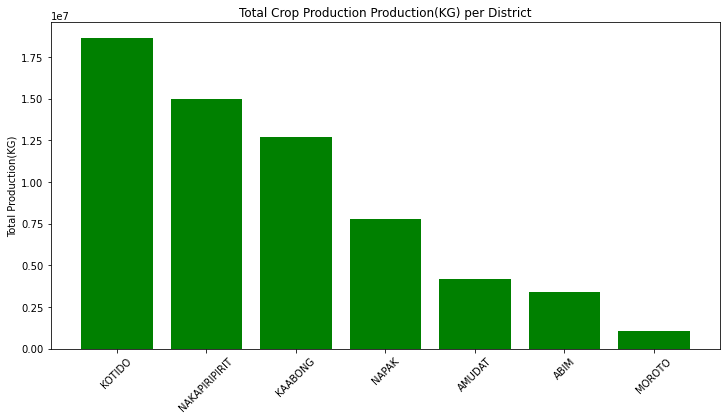

In [47]:
#Sort the productivity from highest to lowest
district_df_sorted = master_df.sort_values(by="District Prod", ascending=False)

plt.figure(figsize=(12,6))


plt.bar(district_df_sorted["DISTRICT_NAME"], district_df_sorted["District Prod"], label="Maize Productivity",  color="green")

#Details
plt.xticks(rotation=45)
plt.ylabel("Total Production(KG)")
plt.title("Total Crop Production Production(KG) per District")
# plt.legend()
plt.show()

##### **Observation:**

Kotido has the highest crop production at 18642479 Kgs while Moroto is perfoming dismally.



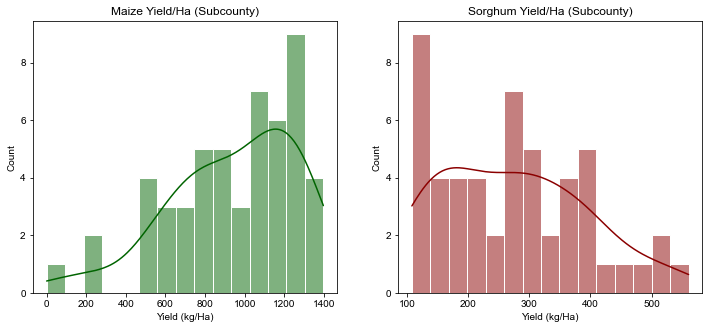

In [48]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.set_style("darkgrid")
sns.histplot(master_df["M_Yield_Ha"], bins=15, kde=True, ax=axes[0], color="darkgreen")
axes[0].set_title("Maize Yield/Ha (Subcounty)")
axes[0].set_xlabel("Yield (kg/Ha)")

sns.histplot(master_df["S_Yield_Ha"], bins=15, kde=True, ax=axes[1], color="darkred")
axes[1].set_title("Sorghum Yield/Ha (Subcounty)")
axes[1].set_xlabel("Yield (kg/Ha)")

plt.show()

#### Observation:

Maize yield has a positive distribution with more subcounties producing between 1000-1200Kgs while sorghum has a negative 

distribution with more subcounties producing between 100-300Kgs. 


This implies maize production is well estabished in most areas.

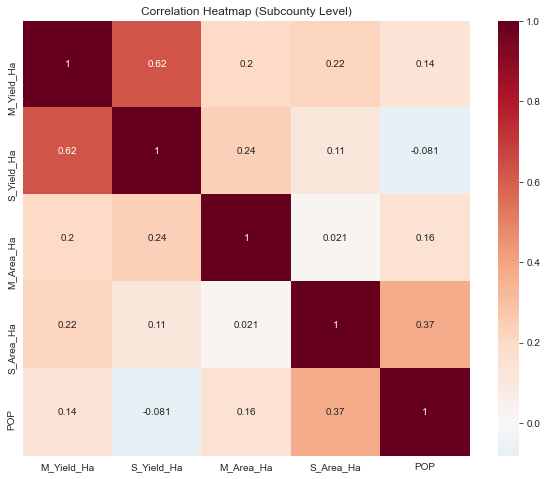

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(master_df[["M_Yield_Ha", "S_Yield_Ha", "M_Area_Ha", "S_Area_Ha", "POP"]].corr(), 
            annot=True, cmap="RdBu_r", center=0)
plt.title("Correlation Heatmap (Subcounty Level)")
plt.show()

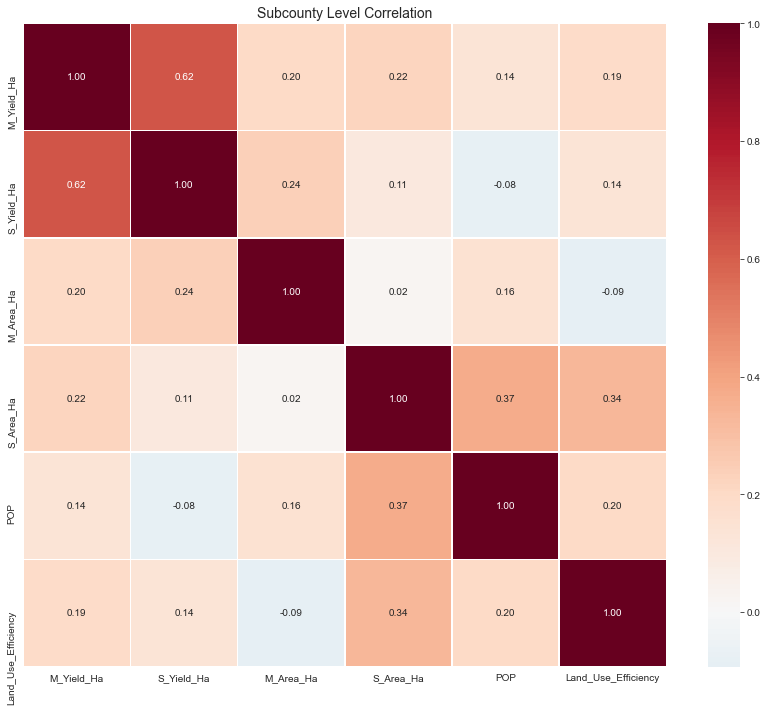

In [50]:
plt.figure(figsize=(12,10))

# Include efficiency and per capita metrics in correlation
subcounty_corr = master_df[["M_Yield_Ha", "S_Yield_Ha", "M_Area_Ha", "S_Area_Ha", "POP", 
                            "Land_Use_Efficiency"]].corr()

sns.heatmap(subcounty_corr, 
            annot=True, 
            cmap="RdBu_r", 
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5)

#Details
plt.title("Subcounty Level Correlation" , fontsize=14)
plt.tight_layout()
plt.show()

#### Observations

- Maize and sorghum yields have a relatively strong correlation, implying both cereals tend to perform well in the given conditions.

- Population has a weak postive correlation with land use. Hence, a higher population does not imply better land use.

- Maize and sorghum areas have a negligible relationship; there is no relation on the area on which they are cultivated.

#### Export dataframes as csv

In [ ]:
# Download the district data
district_df.to_csv('TABLES/karamoja_district.csv', index=False)

# Download the subcounty data
subcounty_df.to_csv('TABLES/karamoja_subcounty.csv', index=False)

# Download master_df
master_df.to_csv('TABLES/karamoja_master.csv', index=False)

